# Importing the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import ExcelWriter
from pandas import ExcelFile

In [2]:
excel = pd.ExcelFile("POC-DATA-JUNE1.xlsx")

In [3]:
excel.sheet_names

['CUSTOMER SEGMENTATION',
 'Sheet1',
 '2018 PLAN',
 'SALES_DATA',
 'PRODUCT',
 'INVENTORY DATA',
 'CUSTOMER_DATA',
 'INVENTORY SEGMENTATION']

In [4]:
df1 = excel.parse("SALES_DATA")

In [5]:
df1.columns

Index(['InvoiceNo', 'StockCode', 'Quantity Shipped', 'Year', 'Invoice Date',
       'UnitPrice', 'Ext-Price', 'CustomerID', 'Country', 'GM%', 'Shipper',
       'COST', 'EXT COST', 'REGION', 'SALES P', 'Unnamed: 15'],
      dtype='object')

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566309 entries, 0 to 566308
Data columns (total 16 columns):
InvoiceNo           566309 non-null object
StockCode           566309 non-null object
Quantity Shipped    566309 non-null float64
Year                566309 non-null int64
Invoice Date        566309 non-null object
UnitPrice           566309 non-null float64
Ext-Price           566309 non-null float64
CustomerID          566309 non-null int64
Country             566309 non-null object
GM%                 566309 non-null float64
Shipper             566309 non-null object
COST                566309 non-null float64
EXT COST            566309 non-null float64
REGION              566309 non-null object
SALES P             566309 non-null object
Unnamed: 15         166199 non-null float64
dtypes: float64(7), int64(2), object(7)
memory usage: 69.1+ MB


In [7]:
df1['Quantity Shipped'] = df1['Quantity Shipped'].astype(np.int64)

In [8]:
df1.drop(df1.loc[df1['Quantity Shipped']==0].index, inplace=True)

In [9]:
df1.drop(df1.columns[len(df1.columns)-1], axis=1, inplace=True)

In [10]:
df1.columns

Index(['InvoiceNo', 'StockCode', 'Quantity Shipped', 'Year', 'Invoice Date',
       'UnitPrice', 'Ext-Price', 'CustomerID', 'Country', 'GM%', 'Shipper',
       'COST', 'EXT COST', 'REGION', 'SALES P'],
      dtype='object')

In [11]:
df1['Ext-Price'] = df1['UnitPrice'] * df1['Quantity Shipped']

In [12]:
df1['EXT COST'] = df1['COST'] * df1['Quantity Shipped']

In [13]:
df1['GM%'] = (df1['Ext-Price'] - df1['EXT COST'])/df1['Ext-Price']

In [14]:
df2 = excel.parse("PRODUCT")

In [15]:
df3 = excel.parse("INVENTORY DATA")

In [16]:
df3['StockCode'].nunique()

3738

In [17]:
df4 = excel.parse("CUSTOMER_DATA")

In [18]:
df4['CustomerID'].nunique()

4372

In [19]:
df2['StockCode'].nunique()

3958

In [20]:
df3['StockCode'].nunique()

3738

In [21]:
df1['StockCode'].nunique()

3898

In [22]:
df_merged = pd.merge(df1, df2, on = ['StockCode'], how = 'inner')

In [23]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554417 entries, 0 to 554416
Data columns (total 16 columns):
InvoiceNo           554417 non-null object
StockCode           554417 non-null object
Quantity Shipped    554417 non-null int64
Year                554417 non-null int64
Invoice Date        554417 non-null object
UnitPrice           554417 non-null float64
Ext-Price           554417 non-null float64
CustomerID          554417 non-null int64
Country             554417 non-null object
GM%                 554417 non-null float64
Shipper             554417 non-null object
COST                554417 non-null float64
EXT COST            554417 non-null float64
REGION              554417 non-null object
SALES P             554417 non-null object
Commodity           554417 non-null object
dtypes: float64(5), int64(3), object(8)
memory usage: 71.9+ MB


In [24]:
df_merged.columns

Index(['InvoiceNo', 'StockCode', 'Quantity Shipped', 'Year', 'Invoice Date',
       'UnitPrice', 'Ext-Price', 'CustomerID', 'Country', 'GM%', 'Shipper',
       'COST', 'EXT COST', 'REGION', 'SALES P', 'Commodity'],
      dtype='object')

In [25]:
df_merged['Profit'] = df_merged['Ext-Price'] - df_merged['EXT COST']

In [26]:
df_merged = pd.DataFrame(df_merged[['StockCode', 'Commodity', 'InvoiceNo','Invoice Date', 'CustomerID', 
                                    'GM%', 'REGION', 'Ext-Price', 'EXT COST', 'Profit']])

In [27]:
df_merged.head(100)

,StockCode,Commodity,InvoiceNo,Invoice Date,CustomerID,GM%,REGION,Ext-Price,EXT COST,Profit
0,20668,Bolt,536390,2016-12-01 00:00:00,17511,-0.004235,SOUTH,13.196560,13.252443,-0.055883
1,20668,Bolt,536796,2016-12-02 00:00:00,15574,-0.009293,NORTH,29.290928,29.563142,-0.272214
2,20668,Bolt,536813,2016-12-02 00:00:00,15646,0.000303,NORTH,12.236736,12.233024,0.003712
3,20668,Bolt,536975,2016-12-03 00:00:00,14911,-0.003594,NORTH,12.189216,12.233024,-0.043808
4,20668,Bolt,536876,2016-12-03 00:00:00,13576,0.002206,NORTH,13.281736,13.252443,0.029293
5,20668,Bolt,537201,2016-12-05 00:00:00,12472,-0.017904,NORTH,1.001488,1.019419,-0.017931
6,20668,Bolt,537382,2016-12-06 00:00:00,16710,-0.012228,NORTH,26.184704,26.504886,-0.320182
7,20668,Bolt,537852,2016-12-08 00:00:00,17340,0.000480,NORTH,4.079632,4.077675,0.001957
8,20668,Bolt,537837,2016-12-08 00:00:00,13077,-0.016686,NORTH,16.043008,16.310699,-0.267691
9,20668,Bolt,537823,2016-12-08 00:00:00,15923,0.042350,NORTH,23.419000,22.427211,0.991789


In [28]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554417 entries, 0 to 554416
Data columns (total 10 columns):
StockCode       554417 non-null object
Commodity       554417 non-null object
InvoiceNo       554417 non-null object
Invoice Date    554417 non-null object
CustomerID      554417 non-null int64
GM%             554417 non-null float64
REGION          554417 non-null object
Ext-Price       554417 non-null float64
EXT COST        554417 non-null float64
Profit          554417 non-null float64
dtypes: float64(4), int64(1), object(5)
memory usage: 46.5+ MB


In [29]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554417 entries, 0 to 554416
Data columns (total 10 columns):
StockCode       554417 non-null object
Commodity       554417 non-null object
InvoiceNo       554417 non-null object
Invoice Date    554417 non-null object
CustomerID      554417 non-null int64
GM%             554417 non-null float64
REGION          554417 non-null object
Ext-Price       554417 non-null float64
EXT COST        554417 non-null float64
Profit          554417 non-null float64
dtypes: float64(4), int64(1), object(5)
memory usage: 46.5+ MB


In [30]:
df_merged.columns

Index(['StockCode', 'Commodity', 'InvoiceNo', 'Invoice Date', 'CustomerID',
       'GM%', 'REGION', 'Ext-Price', 'EXT COST', 'Profit'],
      dtype='object')

In [31]:
df_merged['Commodity'].value_counts()

Washer    159998
Nut       129798
Screw     122506
Bolt      102248
Studs      39867
Name: Commodity, dtype: int64

In [32]:
df_merged.head()

,StockCode,Commodity,InvoiceNo,Invoice Date,CustomerID,GM%,REGION,Ext-Price,EXT COST,Profit
0,20668,Bolt,536390,2016-12-01 00:00:00,17511,-0.004235,SOUTH,13.196560,13.252443,-0.055883
1,20668,Bolt,536796,2016-12-02 00:00:00,15574,-0.009293,NORTH,29.290928,29.563142,-0.272214
2,20668,Bolt,536813,2016-12-02 00:00:00,15646,0.000303,NORTH,12.236736,12.233024,0.003712
3,20668,Bolt,536975,2016-12-03 00:00:00,14911,-0.003594,NORTH,12.189216,12.233024,-0.043808
4,20668,Bolt,536876,2016-12-03 00:00:00,13576,0.002206,NORTH,13.281736,13.252443,0.029293


# K-Means

In [33]:
from sklearn.cluster import KMeans

In [34]:
df_merged_new = pd.DataFrame(df_merged)

In [35]:
df_merged.head()

,StockCode,Commodity,InvoiceNo,Invoice Date,CustomerID,GM%,REGION,Ext-Price,EXT COST,Profit
0,20668,Bolt,536390,2016-12-01 00:00:00,17511,-0.004235,SOUTH,13.196560,13.252443,-0.055883
1,20668,Bolt,536796,2016-12-02 00:00:00,15574,-0.009293,NORTH,29.290928,29.563142,-0.272214
2,20668,Bolt,536813,2016-12-02 00:00:00,15646,0.000303,NORTH,12.236736,12.233024,0.003712
3,20668,Bolt,536975,2016-12-03 00:00:00,14911,-0.003594,NORTH,12.189216,12.233024,-0.043808
4,20668,Bolt,536876,2016-12-03 00:00:00,13576,0.002206,NORTH,13.281736,13.252443,0.029293


In [36]:
df_merged_new.isnull().sum()

StockCode       0
Commodity       0
InvoiceNo       0
Invoice Date    0
CustomerID      0
GM%             0
REGION          0
Ext-Price       0
EXT COST        0
Profit          0
dtype: int64

In [37]:
df_merged_new.head()

,StockCode,Commodity,InvoiceNo,Invoice Date,CustomerID,GM%,REGION,Ext-Price,EXT COST,Profit
0,20668,Bolt,536390,2016-12-01 00:00:00,17511,-0.004235,SOUTH,13.196560,13.252443,-0.055883
1,20668,Bolt,536796,2016-12-02 00:00:00,15574,-0.009293,NORTH,29.290928,29.563142,-0.272214
2,20668,Bolt,536813,2016-12-02 00:00:00,15646,0.000303,NORTH,12.236736,12.233024,0.003712
3,20668,Bolt,536975,2016-12-03 00:00:00,14911,-0.003594,NORTH,12.189216,12.233024,-0.043808
4,20668,Bolt,536876,2016-12-03 00:00:00,13576,0.002206,NORTH,13.281736,13.252443,0.029293


In [38]:
df_merged_new['Commodity'] = df_merged_new['Commodity'].astype('category')

In [39]:
df_merged_new['Commodity'] = pd.factorize(df_merged_new['Commodity'], sort=True)[0] + 1 

# GM Clustering

In [40]:
df_merged_new.head()

,StockCode,Commodity,InvoiceNo,Invoice Date,CustomerID,GM%,REGION,Ext-Price,EXT COST,Profit
0,20668,1,536390,2016-12-01 00:00:00,17511,-0.004235,SOUTH,13.196560,13.252443,-0.055883
1,20668,1,536796,2016-12-02 00:00:00,15574,-0.009293,NORTH,29.290928,29.563142,-0.272214
2,20668,1,536813,2016-12-02 00:00:00,15646,0.000303,NORTH,12.236736,12.233024,0.003712
3,20668,1,536975,2016-12-03 00:00:00,14911,-0.003594,NORTH,12.189216,12.233024,-0.043808
4,20668,1,536876,2016-12-03 00:00:00,13576,0.002206,NORTH,13.281736,13.252443,0.029293


In [41]:
gm = pd.DataFrame(df_merged_new[['Commodity', 'GM%', 'Profit']])

In [42]:
X1 = gm.values

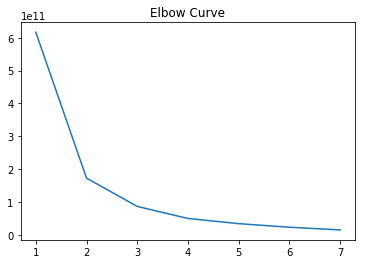

In [43]:
sse = []
for k in range(1,8):
    
    kmeans1 = KMeans(n_clusters = k)
    kmeans1.fit(X1)
    
    sse.append(kmeans1.inertia_) #SSE for each n_clusters
plt.plot(range(1,8), sse)
plt.title("Elbow Curve")
plt.show()

In [44]:
kmeans2 = KMeans(n_clusters=3, init='k-means++', 
            max_iter=100, n_init=1, verbose=0, random_state=1)
kmeans2.fit(X1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=3, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [45]:
y_pred_gm = kmeans2.fit_predict(X1)

Text(0.5, 1.0, 'GM Cluster')

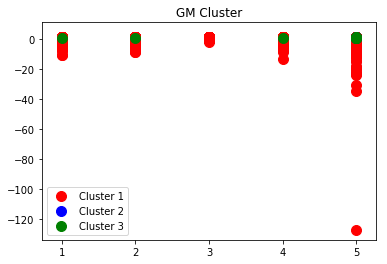

In [46]:
plt.scatter(X1[y_pred_gm == 0, 0], X1[y_pred_gm == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X1[y_pred_gm == 1, 0], X1[y_pred_gm == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X1[y_pred_gm == 2, 0], X1[y_pred_gm == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

#Plotting the centroids of the clusters
plt.legend()
plt.title('GM Cluster')

In [47]:
df_merged_new['Commodity'] = df_merged_new['Commodity'].replace({1: 'Bolts', 2: 'Nuts', 3: 'Screws', 4: 'Studs', 5: 'Washers'})

In [48]:
Commodity1 = pd.DataFrame(df_merged_new['Commodity'])
cluster_labels_gm = pd.DataFrame(kmeans2.labels_)
df_gm = pd.concat([Commodity1, cluster_labels_gm],axis = 1)

In [49]:
df_gm['GM%'] = gm['GM%']

In [50]:
df_gm['Profit'] = gm['Profit']

In [51]:
df_gm.rename(columns = {0: 'Cluster'}, inplace=True)

In [52]:
gm_total = df_gm['GM%'].sum()

In [53]:
profit_total = df_gm['Profit'].sum()

In [54]:
df_gm_cluster_1= df_gm.loc[df_gm['Cluster'] == 0]

In [55]:
df_gm_cluster_1.drop(['Cluster'], axis=1, inplace=True)

C:\Users\shuti\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [56]:
df_gm_cluster_1_means = df_gm_cluster_1.groupby('Commodity')['GM%'].mean().reset_index()

In [57]:
df_profit_cluster_1_means = df_gm_cluster_1.groupby('Commodity')['Profit'].mean().reset_index()

In [58]:
df_gm_cluster_1_means

,Commodity,GM%
0,Bolts,0.058976
1,Nuts,0.073892
2,Screws,0.105327
3,Studs,0.150907
4,Washers,0.045468


In [59]:
df_profit_cluster_1_means

,Commodity,Profit
0,Bolts,9.424494
1,Nuts,8.291147
2,Screws,2.998969
3,Studs,13.643099
4,Washers,15.076943


In [60]:
gm_total_1 = df_gm_cluster_1['GM%'].sum()

In [61]:
profit_total_1 = df_gm_cluster_1['Profit'].sum()

In [62]:
gm_total_percent_1 = gm_total_1/gm_total
print('Cluster 1 Contribution (GM): ', gm_total_percent_1)

Cluster 1 Contribution (GM):  0.9998343906203866


In [63]:
profit_total_percent_1 = profit_total_1/profit_total
print('Cluster 1 Contribution (Profit): ', profit_total_percent_1)

Cluster 1 Contribution (Profit):  0.7288043997552953


In [64]:
df_gm_cluster_1_c1= df_gm_cluster_1.loc[df_gm_cluster_1['Commodity'] == 'Bolts']
gmcluster_1_c1 = df_gm_cluster_1_c1['GM%'].sum()
gmpercent_cluster_1_c1= gmcluster_1_c1/gm_total_1
print ('Bolts Contribution (GM): ',gmpercent_cluster_1_c1)

Bolts Contribution (GM):  0.14420984197448067


In [65]:
df_gm_cluster_1_c2= df_gm_cluster_1.loc[df_gm_cluster_1['Commodity'] == 'Nuts']
gmcluster_1_c2 = df_gm_cluster_1_c2['GM%'].sum()
gmpercent_cluster_1_c2= gmcluster_1_c2/gm_total_1
print ('Nuts Contribution (GM): ',gmpercent_cluster_1_c2)

Nuts Contribution (GM):  0.22936881594052672


In [66]:
df_gm_cluster_1_c3= df_gm_cluster_1.loc[df_gm_cluster_1['Commodity'] == 'Screws']
gmcluster_1_c3 = df_gm_cluster_1_c3['GM%'].sum()
gmpercent_cluster_1_c3= gmcluster_1_c3/gm_total_1
print ('Screws Contribution (GM): ',gmpercent_cluster_1_c3)

Screws Contribution (GM):  0.30858030686199767


In [67]:
df_gm_cluster_1_c4= df_gm_cluster_1.loc[df_gm_cluster_1['Commodity'] == 'Studs']
gmcluster_1_c4 = df_gm_cluster_1_c4['GM%'].sum()
gmpercent_cluster_1_c4= gmcluster_1_c4/gm_total_1
print ('Studs Contribution (GM): ',gmpercent_cluster_1_c4)

Studs Contribution (GM):  0.1438746182006145


In [68]:
df_gm_cluster_1_c5= df_gm_cluster_1.loc[df_gm_cluster_1['Commodity'] == 'Washers']
gmcluster_1_c5 = df_gm_cluster_1_c5['GM%'].sum()
gmpercent_cluster_1_c5 = gmcluster_1_c5/gm_total_1
print ('Washers Contribution (GM): ',gmpercent_cluster_1_c5)

Washers Contribution (GM):  0.17396641702238055


In [69]:
df_profit_cluster_1_c1= df_gm_cluster_1.loc[df_gm_cluster_1['Commodity'] == 'Bolts']
profitcluster_1_c1 = df_profit_cluster_1_c1['Profit'].sum()
profitpercent_cluster_1_c1= profitcluster_1_c1/profit_total_1
print ('Bolts Contribution (Profit): ',profitpercent_cluster_1_c1)

Bolts Contribution (Profit):  0.1796729092818313


In [70]:
df_profit_cluster_1_c2 = df_gm_cluster_1.loc[df_gm_cluster_1['Commodity'] == 'Nuts']
profitcluster_1_c2 = df_profit_cluster_1_c2['Profit'].sum()
profitpercent_cluster_1_c2 = profitcluster_1_c2/profit_total_1
print ('Nuts Contribution (Profit): ',profitpercent_cluster_1_c2)

Nuts Contribution (Profit):  0.2006565218254823


In [71]:
df_profit_cluster_1_c3= df_gm_cluster_1.loc[df_gm_cluster_1['Commodity'] == 'Screws']
profitcluster_1_c3 = df_profit_cluster_1_c3['Profit'].sum()
profitpercent_cluster_1_c3= profitcluster_1_c3/profit_total_1
print ('Screws Contribution (Profit): ',profitpercent_cluster_1_c3)

Screws Contribution (Profit):  0.06850202143040728


In [72]:
df_profit_cluster_1_c4= df_gm_cluster_1.loc[df_gm_cluster_1['Commodity'] == 'Studs']
profitcluster_1_c4 = df_profit_cluster_1_c4['Profit'].sum()
profitpercent_cluster_1_c4= profitcluster_1_c4/profit_total_1
print ('Studs Contribution (Profit): ',profitpercent_cluster_1_c4)

Studs Contribution (Profit):  0.10141208063798948


In [73]:
df_profit_cluster_1_c5 = df_gm_cluster_1.loc[df_gm_cluster_1['Commodity'] == 'Washers']
profitcluster_1_c5 = df_profit_cluster_1_c5['Profit'].sum()
profitpercent_cluster_1_c5 = profitcluster_1_c5/profit_total_1
print ('Washers Contribution (Profit): ',profitpercent_cluster_1_c5)

Washers Contribution (Profit):  0.4497564668242897


In [74]:
df_gm_cluster_2= df_gm.loc[df_gm['Cluster'] == 1]

In [75]:
df_gm_cluster_2.drop(['Cluster'], axis=1, inplace=True)

In [76]:
df_gm_cluster_2_means = df_gm_cluster_2.groupby('Commodity')['GM%'].mean().reset_index()

In [77]:
df_profit_cluster_2_means = df_gm_cluster_2.groupby('Commodity')['Profit'].mean().reset_index()

In [78]:
df_gm_cluster_2_means

,Commodity,GM%
0,Washers,0.835047


In [79]:
df_profit_cluster_2_means

,Commodity,Profit
0,Washers,453665.592324


In [80]:
gm_total_2 = df_gm_cluster_2['GM%'].sum()

In [81]:
profit_total_2 = df_gm_cluster_2['Profit'].sum()

In [82]:
gm_total_percent_2 = gm_total_2/gm_total
print('Cluster 2 Contribution (GM): ', gm_total_percent_2)

Cluster 2 Contribution (GM):  3.9933845733363135e-05


In [83]:
profit_total_percent_2 = profit_total_2/profit_total
print('Cluster 2 Contribution (Profit): ', profit_total_percent_2)

Cluster 2 Contribution (Profit):  0.12329652226993991


In [84]:
df_gm_cluster_2_c1= df_gm_cluster_2.loc[df_gm_cluster_2['Commodity'] == 'Washers']
gmcluster_2_c1 = df_gm_cluster_2_c1['GM%'].sum()
gmpercent_cluster_2_c1= gmcluster_2_c1/gm_total_2
print ('Washers Contribution (GM): ',gmpercent_cluster_2_c1)

Washers Contribution (GM):  1.0


In [85]:
df_profit_cluster_2_c1= df_gm_cluster_2.loc[df_gm_cluster_2['Commodity'] == 'Washers']
profitcluster_2_c1 = df_profit_cluster_2_c1['Profit'].sum()
profitpercent_cluster_2_c1= profitcluster_2_c1/profit_total_2
print ('Washers Contribution (Profit): ',profitpercent_cluster_2_c1)

Washers Contribution (Profit):  1.0


In [86]:
df_gm_cluster_3= df_gm.loc[df_gm['Cluster'] == 2]

In [87]:
df_gm_cluster_3.drop(['Cluster'], axis=1, inplace=True)

In [88]:
df_gm_cluster_3_means = df_gm_cluster_3.groupby('Commodity')['GM%'].mean().reset_index()

In [89]:
df_profit_cluster_3_means = df_gm_cluster_3.groupby('Commodity')['Profit'].mean().reset_index()

In [90]:
df_gm_cluster_3_means

,Commodity,GM%
0,Bolts,0.287166
1,Nuts,0.329097
2,Studs,0.502788
3,Washers,0.590984


In [91]:
df_profit_cluster_3_means

,Commodity,Profit
0,Bolts,108186.186607
1,Nuts,69228.408619
2,Studs,65949.053706
3,Washers,120716.594607


In [92]:
gm_total_3 = df_gm_cluster_3['GM%'].sum()
gm_total_percent_3 = gm_total_3/gm_total
print('Cluster 3 Contribution (GM): ', gm_total_percent_3)

Cluster 3 Contribution (GM):  0.00012567553388016773


In [93]:
profit_total_3 = df_gm_cluster_3['Profit'].sum()
profit_total_percent_3 = profit_total_3/profit_total
print('Cluster 3 Contribution (Profit): ', profit_total_percent_3)

Cluster 3 Contribution (Profit):  0.1478990779747647


In [94]:
df_gm_cluster_3_c1= df_gm_cluster_3.loc[df_gm_cluster_3['Commodity'] == 'Bolts']
gmcluster_3_c1 = df_gm_cluster_3_c1['GM%'].sum()
gmpercent_cluster_3_c1= gmcluster_3_c1/gm_total_3
print ('Bolts Contribution (GM): ',gmpercent_cluster_3_c1)

Bolts Contribution (GM):  0.05463649727962642


In [95]:
df_gm_cluster_3_c2= df_gm_cluster_3.loc[df_gm_cluster_3['Commodity'] == 'Nuts']
gmcluster_3_c2 = df_gm_cluster_3_c2['GM%'].sum()
gmpercent_cluster_3_c2= gmcluster_3_c2/gm_total_3
print ('Nuts Contribution (GM): ',gmpercent_cluster_3_c2)

Nuts Contribution (GM):  0.06261430139286506


In [96]:
df_gm_cluster_3_c3= df_gm_cluster_3.loc[df_gm_cluster_3['Commodity'] == 'Studs']
gmcluster_3_c3 = df_gm_cluster_3_c3['GM%'].sum()
gmpercent_cluster_3_c3= gmcluster_3_c3/gm_total_3
print ('Studs Contribution (GM): ',gmpercent_cluster_3_c3)

Studs Contribution (GM):  0.09566095683148332


In [97]:
df_gm_cluster_3_c4= df_gm_cluster_3.loc[df_gm_cluster_3['Commodity'] == 'Washers']
gmcluster_3_c4 = df_gm_cluster_3_c4['GM%'].sum()
gmpercent_cluster_3_c4= gmcluster_3_c4/gm_total_3
print ('Washers Contribution (GM): ',gmpercent_cluster_3_c4)

Washers Contribution (GM):  0.7870882444960251


In [98]:
df_profit_cluster_3_c1= df_gm_cluster_3.loc[df_gm_cluster_3['Commodity'] == 'Bolts']
profitcluster_3_c1 = df_gm_cluster_3_c1['Profit'].sum()
profitpercent_cluster_3_c1= profitcluster_3_c1/profit_total_3
print ('Bolts Contribution (Profit): ',profitpercent_cluster_3_c1)

Bolts Contribution (Profit):  0.09940113322224982


In [99]:
df_profit_cluster_3_c2= df_gm_cluster_3.loc[df_gm_cluster_3['Commodity'] == 'Nuts']
profitcluster_3_c2 = df_gm_cluster_3_c2['Profit'].sum()
profitpercent_cluster_3_c2= profitcluster_3_c2/profit_total_3
print ('Nuts Contribution (Profit): ',profitpercent_cluster_3_c2)

Nuts Contribution (Profit):  0.06360684745173407


In [100]:
df_profit_cluster_3_c3= df_gm_cluster_3.loc[df_gm_cluster_3['Commodity'] == 'Studs']
profitcluster_3_c3 = df_gm_cluster_3_c3['Profit'].sum()
profitpercent_cluster_3_c3= profitcluster_3_c3/profit_total_3
print ('Studs Contribution (Profit): ',profitpercent_cluster_3_c3)

Studs Contribution (Profit):  0.06059378631275548


In [101]:
df_profit_cluster_3_c4= df_gm_cluster_3.loc[df_gm_cluster_3['Commodity'] == 'Washers']
profitcluster_3_c4 = df_gm_cluster_3_c4['Profit'].sum()
profitpercent_cluster_3_c4= profitcluster_3_c4/profit_total_3
print ('Washers Contribution (Profit): ',profitpercent_cluster_3_c4)

Washers Contribution (Profit):  0.7763982330132606


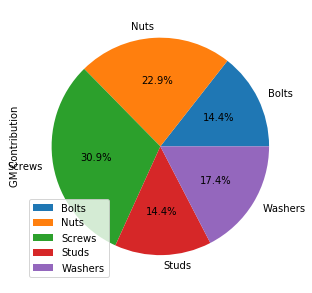

In [102]:
datac1 = [['Bolts', gmpercent_cluster_1_c1], ['Nuts', gmpercent_cluster_1_c2], ['Screws', gmpercent_cluster_1_c3],
         ['Studs', gmpercent_cluster_1_c4], ['Washers', gmpercent_cluster_1_c5]]
df_c1percent = pd.DataFrame(datac1, columns = ['Commodity', 'GM Contribution']) 
df_c1percent
plot = df_c1percent.plot.pie(y='GM Contribution', autopct='%1.1f%%', labels = df_c1percent['Commodity'], figsize=(5, 5))

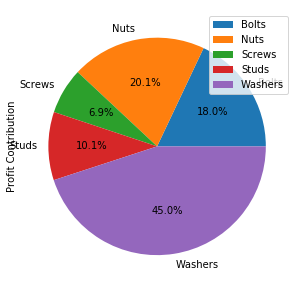

In [103]:
datac2 = [['Bolts', profitpercent_cluster_1_c1], ['Nuts', profitpercent_cluster_1_c2], ['Screws', profitpercent_cluster_1_c3],
         ['Studs', profitpercent_cluster_1_c4], ['Washers', profitpercent_cluster_1_c5]]
df_c2percent = pd.DataFrame(datac2, columns = ['Commodity', 'Profit Contribution']) 
df_c2percent
plot = df_c2percent.plot.pie(y='Profit Contribution', autopct='%1.1f%%', labels = df_c2percent['Commodity'], figsize=(5, 5))

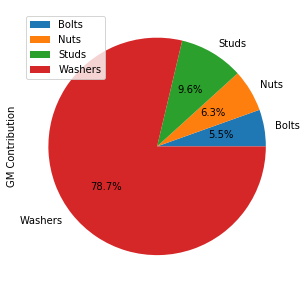

In [104]:
datac3 = [['Bolts', gmpercent_cluster_3_c1], ['Nuts', gmpercent_cluster_3_c2],
         ['Studs', gmpercent_cluster_3_c3], ['Washers', gmpercent_cluster_3_c4]]
df_c3percent = pd.DataFrame(datac3, columns = ['Commodity', 'GM Contribution']) 
df_c3percent
plot = df_c3percent.plot.pie(y='GM Contribution', autopct='%1.1f%%', labels = df_c3percent['Commodity'], figsize=(5, 5))

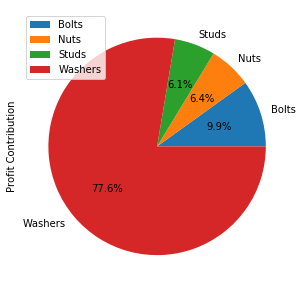

In [105]:
datac4 = [['Bolts', profitpercent_cluster_3_c1], ['Nuts', profitpercent_cluster_3_c2],
         ['Studs', profitpercent_cluster_3_c3], ['Washers', profitpercent_cluster_3_c4]]
df_c4percent = pd.DataFrame(datac4, columns = ['Commodity', 'Profit Contribution']) 
df_c4percent
plot = df_c4percent.plot.pie(y='Profit Contribution', autopct='%1.1f%%', labels = df_c4percent['Commodity'], figsize=(5, 5))

In [106]:
cluster_labels = pd.DataFrame(kmeans2.labels_)

In [107]:
final_df = pd.concat([df_merged, cluster_labels], axis=1)

In [108]:
final_df.head()

,StockCode,Commodity,InvoiceNo,Invoice Date,CustomerID,GM%,REGION,Ext-Price,EXT COST,Profit,0
0,20668,1,536390,2016-12-01 00:00:00,17511,-0.004235,SOUTH,13.196560,13.252443,-0.055883,0
1,20668,1,536796,2016-12-02 00:00:00,15574,-0.009293,NORTH,29.290928,29.563142,-0.272214,0
2,20668,1,536813,2016-12-02 00:00:00,15646,0.000303,NORTH,12.236736,12.233024,0.003712,0
3,20668,1,536975,2016-12-03 00:00:00,14911,-0.003594,NORTH,12.189216,12.233024,-0.043808,0
4,20668,1,536876,2016-12-03 00:00:00,13576,0.002206,NORTH,13.281736,13.252443,0.029293,0


In [109]:
final_df.rename(columns = {0:'Cluster'}, inplace = True) 

In [110]:
final_df['Cluster'] = final_df['Cluster'].astype('category')

In [111]:
final_df['Cluster'] = pd.factorize(final_df['Cluster'], sort=True)[0] + 1 

In [112]:
final_df.head()

,StockCode,Commodity,InvoiceNo,Invoice Date,CustomerID,GM%,REGION,Ext-Price,EXT COST,Profit,Cluster
0,20668,1,536390,2016-12-01 00:00:00,17511,-0.004235,SOUTH,13.196560,13.252443,-0.055883,1
1,20668,1,536796,2016-12-02 00:00:00,15574,-0.009293,NORTH,29.290928,29.563142,-0.272214,1
2,20668,1,536813,2016-12-02 00:00:00,15646,0.000303,NORTH,12.236736,12.233024,0.003712,1
3,20668,1,536975,2016-12-03 00:00:00,14911,-0.003594,NORTH,12.189216,12.233024,-0.043808,1
4,20668,1,536876,2016-12-03 00:00:00,13576,0.002206,NORTH,13.281736,13.252443,0.029293,1


In [113]:
final_df['Cluster'].value_counts()

1    554405
3        10
2         2
Name: Cluster, dtype: int64

In [114]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554417 entries, 0 to 554416
Data columns (total 11 columns):
StockCode       554417 non-null object
Commodity       554417 non-null int64
InvoiceNo       554417 non-null object
Invoice Date    554417 non-null object
CustomerID      554417 non-null int64
GM%             554417 non-null float64
REGION          554417 non-null object
Ext-Price       554417 non-null float64
EXT COST        554417 non-null float64
Profit          554417 non-null float64
Cluster         554417 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 50.8+ MB


In [115]:
final_df.head()

,StockCode,Commodity,InvoiceNo,Invoice Date,CustomerID,GM%,REGION,Ext-Price,EXT COST,Profit,Cluster
0,20668,1,536390,2016-12-01 00:00:00,17511,-0.004235,SOUTH,13.196560,13.252443,-0.055883,1
1,20668,1,536796,2016-12-02 00:00:00,15574,-0.009293,NORTH,29.290928,29.563142,-0.272214,1
2,20668,1,536813,2016-12-02 00:00:00,15646,0.000303,NORTH,12.236736,12.233024,0.003712,1
3,20668,1,536975,2016-12-03 00:00:00,14911,-0.003594,NORTH,12.189216,12.233024,-0.043808,1
4,20668,1,536876,2016-12-03 00:00:00,13576,0.002206,NORTH,13.281736,13.252443,0.029293,1


In [116]:
final_df['Cluster'] = final_df['Cluster'].replace({1: 'Must Invest In', 2: 'Hold Off For Now', 3: 'Hold Off'})

In [117]:
final_df['Commodity'] = final_df['Commodity'].replace({1: 'Bolts', 2: 'Nuts', 3: 'Screws', 4: 'Studs', 5: 'Washers'})

In [118]:
final_df.head()

,StockCode,Commodity,InvoiceNo,Invoice Date,CustomerID,GM%,REGION,Ext-Price,EXT COST,Profit,Cluster
0,20668,Bolts,536390,2016-12-01 00:00:00,17511,-0.004235,SOUTH,13.196560,13.252443,-0.055883,Must Invest In
1,20668,Bolts,536796,2016-12-02 00:00:00,15574,-0.009293,NORTH,29.290928,29.563142,-0.272214,Must Invest In
2,20668,Bolts,536813,2016-12-02 00:00:00,15646,0.000303,NORTH,12.236736,12.233024,0.003712,Must Invest In
3,20668,Bolts,536975,2016-12-03 00:00:00,14911,-0.003594,NORTH,12.189216,12.233024,-0.043808,Must Invest In
4,20668,Bolts,536876,2016-12-03 00:00:00,13576,0.002206,NORTH,13.281736,13.252443,0.029293,Must Invest In


In [119]:
final_df.to_csv('final_file.csv')

In [120]:
final_df.head()

,StockCode,Commodity,InvoiceNo,Invoice Date,CustomerID,GM%,REGION,Ext-Price,EXT COST,Profit,Cluster
0,20668,Bolts,536390,2016-12-01 00:00:00,17511,-0.004235,SOUTH,13.196560,13.252443,-0.055883,Must Invest In
1,20668,Bolts,536796,2016-12-02 00:00:00,15574,-0.009293,NORTH,29.290928,29.563142,-0.272214,Must Invest In
2,20668,Bolts,536813,2016-12-02 00:00:00,15646,0.000303,NORTH,12.236736,12.233024,0.003712,Must Invest In
3,20668,Bolts,536975,2016-12-03 00:00:00,14911,-0.003594,NORTH,12.189216,12.233024,-0.043808,Must Invest In
4,20668,Bolts,536876,2016-12-03 00:00:00,13576,0.002206,NORTH,13.281736,13.252443,0.029293,Must Invest In


In [121]:
data1 = [['Must Invest In', gm_total_1], ['Hold Off For Now', gm_total_2], ['Hold Off', gm_total_3]]

In [122]:
df_percent = pd.DataFrame(data1, columns = ['Cluster', 'GM Contribution']) 
df_percent

,Cluster,GM Contribution
0,Must Invest In,41814.578163
1,Hold Off For Now,1.670093
2,Hold Off,5.255940


In [123]:
data2 = [['Must Invest In', profit_total_1], ['Hold Off For Now', profit_total_2], ['Hold Off', profit_total_3]]

In [124]:
df_percent2 = pd.DataFrame(data2, columns = ['Cluster', 'Profit Contribution']) 
df_percent2

,Cluster,Profit Contribution
0,Must Invest In,5.363225e+06
1,Hold Off For Now,9.073312e+05
2,Hold Off,1.088380e+06


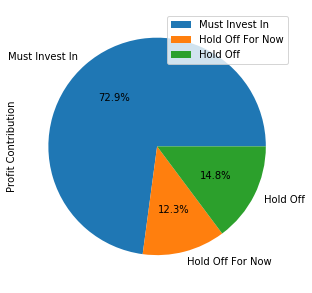

In [125]:
plot = df_percent2.plot.pie(y='Profit Contribution', autopct='%1.1f%%', labels=df_percent2['Cluster'], figsize=(5, 5))

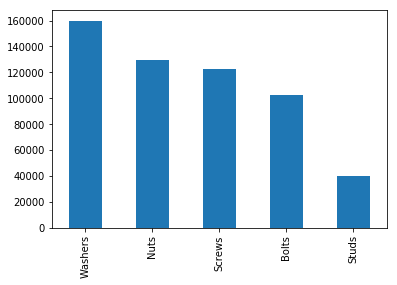

In [126]:
final_df['Commodity'].value_counts().plot(kind='bar')